# MNIST Practive

1. basic
2. xavier
3. deep
4. relu
5. dropout
6. batchnorm

In [1]:
from sklearn.datasets import load_digits
import tensorflow as tf
import matplotlib.pyplot as plt

## load data

In [2]:
mnist_data = load_digits()
mnist_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
mnist_data.images.shape, mnist_data.images.min(), mnist_data.images.max()

((1797, 8, 8), 0.0, 16.0)

In [4]:
x_data = mnist_data.images.reshape((1797, 64)).astype('float32')
x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())

x_data.dtype, x_data.shape

(dtype('float32'), (1797, 64))

In [5]:
# split train test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =\
    train_test_split(x_data, mnist_data.target, test_size=.2, random_state=42)

y_train = tf.one_hot(y_train.astype('float32'), depth=10)
y_test = tf.one_hot(y_test.astype('float32'), depth=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), TensorShape([1437, 10]), TensorShape([360, 10]))

## basic model

In [6]:
W = tf.Variable(tf.random.normal((64, 10), dtype='float32'), dtype='float32')
b = tf.Variable(tf.random.normal((10,), dtype='float32'), dtype='float32')

def simple_model(X, W, b):
    return tf.nn.softmax(tf.matmul(X, W) + b)

def loss(pred, true):
    return -true*tf.math.log(pred)-(1-true)*tf.math.log(1-pred)

learning_rate = 0.001
sgd = tf.optimizers.legacy.SGD(learning_rate)

In [7]:
epochs = 501

for e in range(epochs):
    with tf.GradientTape() as tape:
        pred = simple_model(X_train, W, b)
        cost = loss(pred, y_train)
    
    # 파라미터 업데이트
    sgd.minimize(cost, var_list=[W, b], tape=tape)

    # print(pred)
    if e%100==0:
        print(f'epochs: {e}, cost: {tf.reduce_sum(cost)}')
    

epochs: 0, cost: 15107.712890625
epochs: 100, cost: 538.5036010742188
epochs: 200, cost: 359.4961242675781
epochs: 300, cost: 287.82421875
epochs: 400, cost: 246.5620880126953
epochs: 500, cost: 218.5953369140625


0.96944445


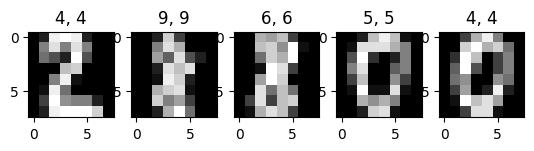

In [8]:
import random

# inference
pred = simple_model(X_test, W, b)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred, axis=1), 
    tf.argmax(y_test, axis=1)), dtype='float32')).numpy()
print(acc)

for i in range(5):
    plt.subplot(151+i)
    i = random.randint(0, y_test.shape[0])
    plt.imshow(x_data[i].reshape((8,8)), cmap='gray')
    plt.title(f"{tf.argmax(y_test[i])}, {tf.argmax(pred[i])}")

## xavier initialized model

In [9]:
import numpy as np

# xavier initializer
def xavier_init(shape):
    if len(shape) > 1:
        fan_in = shape[0]
        fan_out = shape[1]
        return np.random.randn(fan_in,fan_out)/np.sqrt(fan_in)
    else:
        fan_in = shape[0]
        return np.random.randn(fan_in)/np.sqrt(fan_in)

def he_init(shape):
    fan_in = shape[0]
    fan_out = shape[1]
    return np.random.randn(fan_in+fan_out)/np.sqrt(fan_in)

In [10]:
W2 = tf.Variable(xavier_init((64, 10)), dtype='float32')
b2 = tf.Variable(xavier_init((10, )), dtype='float32')

In [11]:
epochs = 501

for e in range(epochs):
    with tf.GradientTape() as tape:
        pred = simple_model(X_train, W2, b2)
        cost = loss(pred, y_train)
    
    # 파라미터 업데이트
    sgd.minimize(cost, var_list=[W2, b2], tape=tape)

    # print(pred)
    if e%100==0:
        print(f'epochs: {e}, cost: {tf.reduce_sum(cost)}')
    

epochs: 0, cost: 4917.91943359375
epochs: 100, cost: 457.81298828125
epochs: 200, cost: 328.09228515625
epochs: 300, cost: 270.9531555175781
epochs: 400, cost: 236.09817504882812
epochs: 500, cost: 211.61700439453125


0.96944445


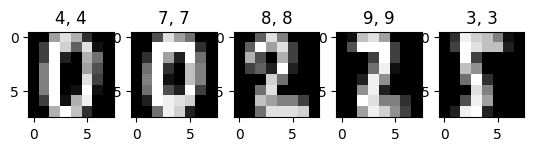

In [12]:
# inference
pred = simple_model(X_test, W, b)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred, axis=1), 
    tf.argmax(y_test, axis=1)), dtype='float32')).numpy()
print(acc)

for i in range(5):
    plt.subplot(151+i)
    i = random.randint(0, y_test.shape[0])
    plt.imshow(x_data[i].reshape((8,8)), cmap='gray')
    plt.title(f"{tf.argmax(y_test[i])}, {tf.argmax(pred[i])}")

## deep model

In [13]:
W3 = tf.Variable(xavier_init((64, 784)), dtype='float32')
b3 = tf.Variable(xavier_init((784, )), dtype='float32')

W4 = tf.Variable(xavier_init((784, 10)), dtype='float32')
b4 = tf.Variable(xavier_init((10, )), dtype='float32')

def deep_model(X, W3, b3, W4, b4):
    l1 = tf.nn.sigmoid(tf.matmul(X, W3) + b3)
    return tf.nn.softmax(tf.matmul(l1, W4) + b4)

learning_rate = 0.001
adam = tf.optimizers.legacy.Adam(learning_rate)

In [14]:
epochs = 701

for e in range(epochs):
    with tf.GradientTape() as tape:
        pred = deep_model(X_train, W3, b3, W4, b4)
        cost = loss(pred, y_train)
    
    # 파라미터 업데이트
    adam.minimize(cost, var_list=[W3, b3, W4, b4], tape=tape)

    # print(pred)
    if e%100==0:
        print(f'epochs: {e}, cost: {tf.reduce_sum(cost)}')

epochs: 0, cost: 4955.17822265625
epochs: 100, cost: 1119.97705078125
epochs: 200, cost: 433.683837890625
epochs: 300, cost: 272.33087158203125
epochs: 400, cost: 192.9766387939453
epochs: 500, cost: 142.94854736328125
epochs: 600, cost: 108.56341552734375
epochs: 700, cost: 83.98458099365234


0.96944445


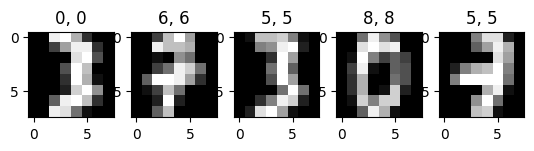

In [15]:
import random

# inference
pred = deep_model(X_test, W3, b3, W4, b4)
acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(pred, axis=1), 
tf.argmax(y_test, axis=1)), dtype='float32')).numpy()
print(acc)

for i in range(5):
    plt.subplot(151+i)
    i = random.randint(0, y_test.shape[0])
    plt.imshow(x_data[i].reshape((8,8)), cmap='gray')
    plt.title(f"{tf.argmax(y_test[i])}, {tf.argmax(pred[i])}")

overfitting 된 듯